<a href="https://colab.research.google.com/github/lizasahu2807/python_project/blob/main/big_basket_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## step:1 load dataset and data exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading the file data
df = pd.read_csv('/content/drive/MyDrive/BigBasket Products')


In [ ]:
df.head(12)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.0,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...
6,7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.0,58.0,Face Care,3.6,Satinance multani matti is an excellent skin t...
7,8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.0,250.0,Hand Wash & Sanitizers,4.0,70%Alcohol based is gentle of hand leaves skin...
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.0,1098.0,Shampoo & Conditioner,3.5,"An exclusive blend with Vitamin B7 Biotin, Hyd..."
9,10,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.0,20.0,"Utensil Scrub-Pad, Glove",4.3,Scotch Brite Anti- Bacterial Scrub Pad thoroug...


## step:2 data cleaning

In [ ]:
df.isnull() .sum()

,0
index,0
product,1
category,0
sub_category,0
brand,1
sale_price,6
market_price,0
type,0
rating,8636
description,115


In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
index,0.000000
product,0.003629
category,0.000000
sub_category,0.000000
brand,0.003629
sale_price,0.021775
market_price,0.000000
type,0.000000
rating,31.340954
description,0.417347


In [ ]:
df_1 = df[df['product'].isnull()]
df_1

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
14363,14364,NaN,Beverages,Coffee,Cothas Coffee,200.0,240.0,Ground Coffee,4.2,Cothas Specialty Blend Coffee and Chicory incl...


In [ ]:
#filling missing values of product column by its original values.
df_1.loc[df_1.index[0],'product'] = ('speciality blend')


In [ ]:
df_1

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
14363,14364,speciality blend,Beverages,Coffee,Cothas Coffee,200.0,240.0,Ground Coffee,4.2,Cothas Specialty Blend Coffee and Chicory incl...


In [ ]:
df = df.set_index('index')
df_1 = df_1.set_index('index')

df.update(df_1)

df = df.reset_index()

In [ ]:
#filling the missing values of description by not_mentioned
df['description'].fillna('not_mentioned',inplace=True)

In [ ]:
#filling the missing value of rating column by median
df['rating'].fillna(df['rating'].median, inplace=True)

In [ ]:
df.isnull().sum()

,0
index,0
product,0
category,0
sub_category,0
brand,1
sale_price,6
market_price,0
type,0
rating,0
description,0


In [ ]:
df[df['brand'].isnull()]
df

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


In [ ]:
#filling the missing value of brand column through its original value
df['brand'].fillna('cliik',inplace=True)

In [ ]:
df.isnull().sum()

,0
index,0
product,0
category,0
sub_category,0
brand,0
sale_price,6
market_price,0
type,0
rating,0
description,0


In [ ]:
df['sale_price'].isnull().sum()

6

In [ ]:
df[df.sale_price.isnull()]

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
1719,1720,Puja Flower Wicks - Puvvu Vathulu Batti,Cleaning & Household,Pooja Needs,Jaji,NaN,20.0,Camphor & Wicks,<bound method Series.median of 0 4.1\n1...,Jaji Puja Flower Batti / Puvvu Vathulu is made...
1720,1721,Powder - Sambar,"Foodgrains, Oil & Masala",Masalas & Spices,Annapoorna,NaN,46.0,Blended Masalas,<bound method Series.median of 0 4.1\n1...,Annaporna Spices are the preserve for Connoiss...
1721,1722,"Steel Fork - Medium, Premium Excel Series, BBCL08","Kitchen, Garden & Pets",Crockery & Cutlery,BB Home,NaN,299.0,"Cutlery, Spoon & Fork",<bound method Series.median of 0 4.1\n1...,BB Home provides fine and classy cutlery that ...
1722,1723,Snack Mix - Dhokla,Snacks & Branded Foods,Ready To Cook & Eat,MTR,NaN,65.0,Breakfast & Snack Mixes,4.1,MTR Dhokla is extremely special in Gujarat. It...
2401,2402,Battery AA 3UT Hi Top,"Kitchen, Garden & Pets",Appliances & Electricals,Nippo,NaN,150.0,Battery & Electrical,4.0,This Nippo battery incorporates state-of-the-a...
2402,2403,Klassic Plain Cocktail Napkins (22 X 22 cm),Cleaning & Household,"Disposables, Garbage Bag",Origami,NaN,32.0,Toilet Paper,3.9,Klassic Plain Cocktail Napkins (22 X 22 cm) 10...


In [ ]:
df.sale_price = df.sale_price.fillna(df.market_price)

In [ ]:
df.sale_price.isnull().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27555 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27555 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        27555 non-null  object 
 9   description   27555 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.1+ MB


In [ ]:
df['rating'] = pd.to_numeric(df['rating'],errors='coerce')

In [ ]:
df.dtypes

,0
index,int64
product,object
category,object
sub_category,object
brand,object
sale_price,object
market_price,float64
type,object
rating,float64
description,object


<Axes: xlabel='market_price', ylabel='sale_price'>

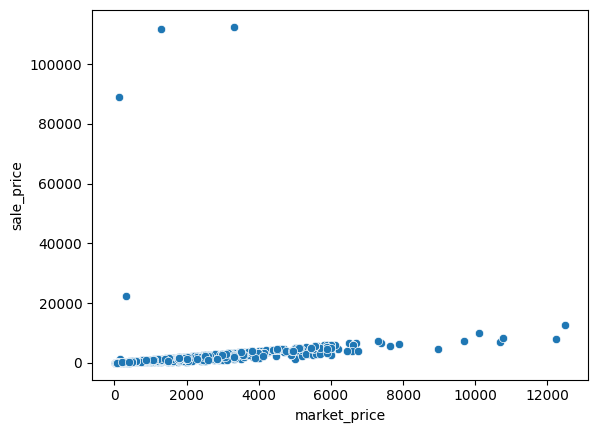

In [ ]:
sns.scatterplot(y="sale_price",x="market_price",data=df)

<Axes: ylabel='sale_price'>

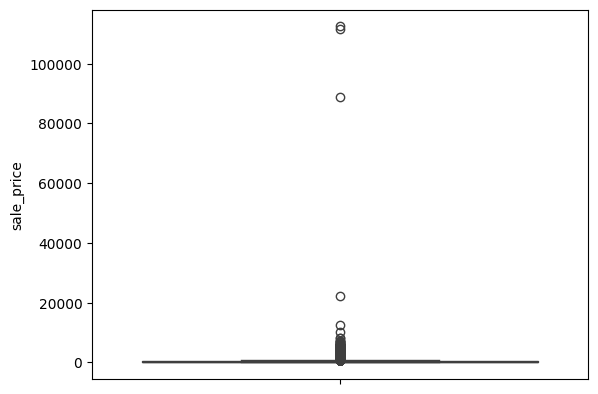

In [ ]:
sns.boxplot(df.sale_price)

In [ ]:
df[df.sale_price>20000]


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
248,249,4mm Aluminium Induction Base Chapati Roti Tawa...,"Kitchen, Garden & Pets",Cookware & Non Stick,HAZEL,111649.0,1289.0,Tawa & Sauce Pan,<bound method Series.median of 0 4.1\n1...,Hazel Aluminium Tawa has an ergonomic design f...
288,289,Arrabbiata Tomato Pasta Sauce With Chilli,Gourmet & World Food,"Sauces, Spreads & Dips",Montanini,22325.0,325.0,Mustard & Cheese Sauces,5.0,not_mentioned
436,437,"Balloon - Polka Dot, 12 Inch",Cleaning & Household,Party & Festive Needs,B Vishal,88899.0,129.0,"Caps, Balloons & Candles",3.9,"Whether it is a party in the office, a Christm..."
1249,1250,Beard Kit,Beauty & Hygiene,Men's Grooming,Uncle Tony,112475.0,3300.0,Combos & Gift Sets,<bound method Series.median of 0 4.1\n1...,"The combination of a beard oil, a beard wash, ..."


In [ ]:
df.sale_price = np.where(df.sale_price>20000,df.market_price,df.sale_price)

<Axes: xlabel='market_price', ylabel='sale_price'>

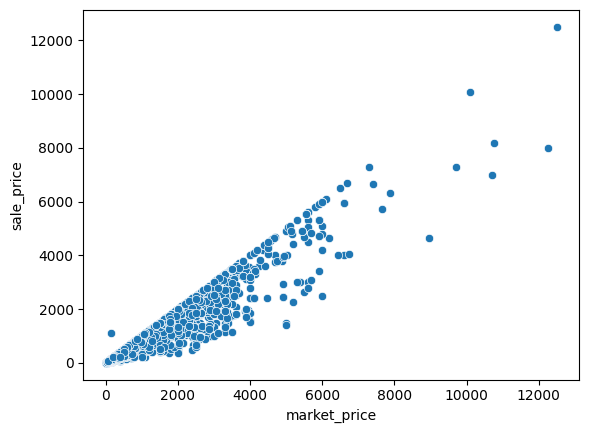

In [ ]:
sns.scatterplot(y="sale_price",x="market_price",data=df)

In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(y=df.sale_price,x=df.market_price,labels=True,title="sale_price vs market_price")
fig.show()

In [ ]:
#scatter graph through plotly
px.scatter(y=df.sale_price,x=df.market_price,labels=True,title="sale_price vs market_price")

### x = 140 ,y =1114.8 ,here x is denoting the market_price and y is denoting sale_price

In [ ]:
df[(df['market_price']==140) & (df['sale_price']==1114.8)]

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
412,413,Original Care Lip Balm For 24h Moisture With S...,Beauty & Hygiene,Skin Care,Nivea,1114.8,140.0,Lip Care,4.3,Nivea Original Care Lip Blam nourishes lips in...


 . The observation reveals a data entry error; the discounted price appears to be 114.8, but it has been erroneously recorded as 1114.8.  

 . we intend to rectify this discrepancy by substituting the incorrect value with the market_price


In [ ]:
df[df.sale_price==1114.8]

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
412,413,Original Care Lip Balm For 24h Moisture With S...,Beauty & Hygiene,Skin Care,Nivea,1114.8,140.0,Lip Care,4.3,Nivea Original Care Lip Blam nourishes lips in...


In [ ]:
df.sale_price = np.where(df.sale_price==1114.8,df.market_price,df.sale_price)

In [ ]:
df[df['index']==413]

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
412,413,Original Care Lip Balm For 24h Moisture With S...,Beauty & Hygiene,Skin Care,Nivea,140.0,140.0,Lip Care,4.3,Nivea Original Care Lip Blam nourishes lips in...


In [ ]:
px.scatter(y=df.sale_price,x=df.market_price)

In [ ]:
# As the DataFrames already possess index numbers, the inclusion of an additional index column is unnecessary.
# We are eliminating the index column from the dataframe

df=df.drop(['index'],axis=1)

In [ ]:
df

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...
27550,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


# step:3 Data analysis and finding insights

## 1. no of products in each category

In [ ]:
df.category.value_counts().sort_values(ascending=False)

,count
category,
Beauty & Hygiene,7867
Gourmet & World Food,4690
"Kitchen, Garden & Pets",3580
Snacks & Branded Foods,2814
"Foodgrains, Oil & Masala",2676
Cleaning & Household,2675
Beverages,885
"Bakery, Cakes & Dairy",851
Baby Care,610


<Axes: xlabel='count', ylabel='category'>

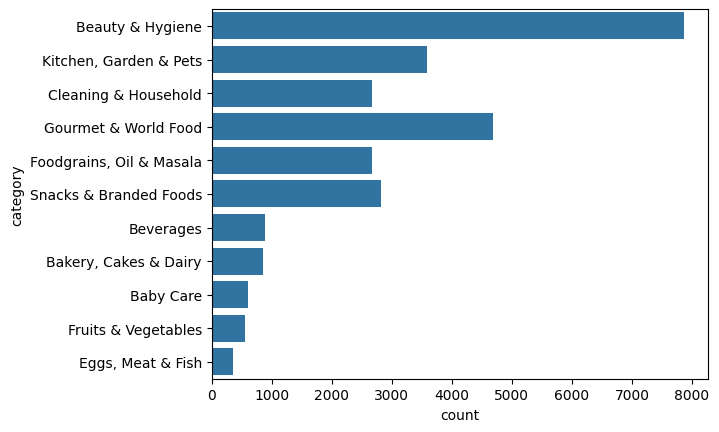

In [ ]:
sns.countplot(y=df.category)

### 1.Beauty & Hygiene

Top-Selling Category: The Beauty & Hygiene category leads in product count, confirming its high demand. Consumers' increasing interest in self-care, wellness, and personal grooming products continues to drive growth in this sector.

### 2.Gourmet & World Food

High Demand: Following closely behind, the Gourmet & World Food category suggests a growing appetite for specialty foods and international cuisine. This aligns with the expanding trend of culinary exploration and premium food products gaining traction among consumers.

### 3.Kitchen, Garden, and Pet Goods
Sustained Demand: Ranking third, this category indicates products with long shelf lives, which cater to a more stable, ongoing demand. Home improvement, gardening, and pet care products show sustained popularity, especially with growing interest in home-based activities and pet ownership.

### 4.Snack & Branded Food, Foodgrains, Oil and Masala, Cleaning & Household
essential and Widespread Appeal: The similar product counts in these categories point to their essential and ubiquitous nature in daily life. These products see consistent usage across various households, indicating regular replenishment and strong consumer loyalty.

### 5.Beverages and Bakery, Cakes & Dairy
Comparable Product Count: Both categories exhibit steady consumer interest. While beverages remain a staple in daily consumption, the Bakery, Cakes & Dairy category reflects the popularity of fresh, indulgent items, likely boosted by convenience and the growing trend of home baking and snacking.

### 6.Baby Care
Niche Market: As one of the lowest in product count, the Baby Care category is specialized due to its focus on infant and child-specific products. This category is sensitive to changes in formulations and packaging, leading companies to be more cautious in product launches. Additionally, the highly regulated nature of this market affects its range of available products.

### 7.Fruits & Vegetables
Limited Range Due to Shelf Life: Fruits & Vegetables have a limited product count, primarily due to their perishable nature and the need for ongoing freshness. This category experiences a high level of supply chain coordination, and its limited variety reflects consumer demand for fresh, local, and seasonal produce.

### 8.Eggs, Meat & Fish
Freshness is Key: The Eggs, Meat & Fish category has the least number of products, emphasizing the need for freshness and careful handling. The supply chain for these products is complex, with significant logistical challenges, such as temperature control and shelf life, limiting the range of available options.

### 9.Big Basket's Stocking of Grocery Items
Surprising Insight: Notably, Big Basket, a major player in grocery delivery, stocks fewer grocery items compared to some of the other categories analyzed. This could be due to supply chain complexities, particularly in perishable categories. Further investigation could reveal strategic choices or operational constraints contributing to this lower product coun2

# Conclusion & Future Outlook
The product quantity analysis provides clear insights into consumer behavior, category demands, and operational considerations. Categories with longer shelf lives or essential nature (e.g., Beauty & Hygiene, Kitchen & Pet Goods) tend to stock higher product counts. Conversely, categories with more specialized, perishable, or niche market demands, like Baby Care, Fruits & Vegetables, and Eggs, Meat & Fish, have fewer products. The surprising lower product range for Big Basket warrants a deeper investigation into their supply chain and strategy.

## 2. analysing the best selling category specially beauty & hygiene

In [ ]:
df[df.category=='Beauty & Hygiene']

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
6,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.00,58.0,Face Care,3.6,Satinance multani matti is an excellent skin t...
7,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.00,250.0,Hand Wash & Sanitizers,4.0,70%Alcohol based is gentle of hand leaves skin...
8,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.00,1098.0,Shampoo & Conditioner,3.5,"An exclusive blend with Vitamin B7 Biotin, Hyd..."
...,...,...,...,...,...,...,...,...,...
27541,Herbal Rose & Apricot Walnut Facial Scrub,Beauty & Hygiene,Skin Care,Khadi Natural,250.00,250.0,Face Care,4.4,Rose and apricot walnut face scrub helps in re...
27542,Embellish Skin Lightening Serum,Beauty & Hygiene,Skin Care,Organic Harvest,1525.75,1795.0,Face Care,4.2,Achieve an everlasting illuminated skin by inc...
27548,Apple Cider Vinegar Shampoo,Beauty & Hygiene,Hair Care,Morpheme Remedies,499.00,499.0,Shampoo & Conditioner,5.0,"Say no to dull, lifeless, dry and damaged hair..."
27550,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...


In [ ]:
sub_cat = df[df.category=='Beauty & Hygiene']

In [ ]:
sub_cat.sub_category.value_counts().sort_values(ascending=False)

,count
sub_category,
Skin Care,2294
Health & Medicine,1133
Hair Care,1028
Fragrances & Deos,1000
Bath & Hand Wash,996
Men's Grooming,805
Feminine Hygiene,285
Oral Care,271
Makeup,48


<Axes: xlabel='count', ylabel='sub_category'>

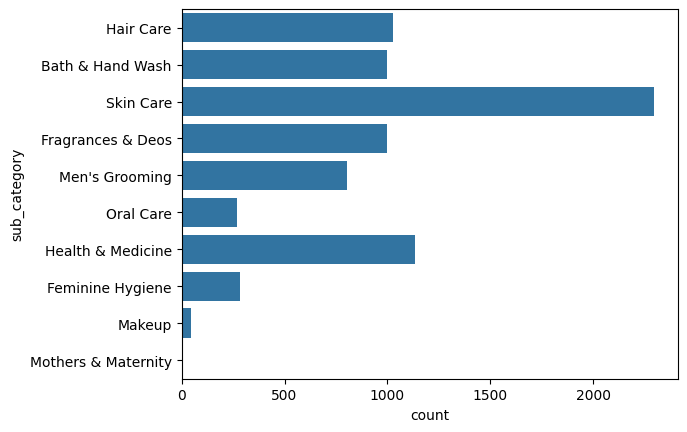

In [ ]:
sns.countplot(y=sub_cat.sub_category)

Observations and Insights

*.*"Skin care" products** are extensively stocked, indicating their versatility, prolonged shelf life, and significant demand.

.The "Health and Medicine"** category ranks as the second-highest, highlighting its versatility and substantial demand.

.**Subsequently**, the categories of "Hair Care","Fragrances & Deos","Bath & Hand Wash", and "Men's Grooming" exhibit similar quantities of products. These fall under the toiletries section, catering to essential daily needs

.The "Oral Care" category exhibits a comparatively lower quantity than our top categories, possibly due to limited competition in this sector and customer tendencies to be less experimental in this specific domain.

**.**The quantity of **"Makeup" products is notably low,** suggesting a possible preference among sellers for platforms other than Big Basket in this particular category.

Insight: Suggesting company could enhance its presence in the "Makeup" category by implementing targeted advertising, introducing enticing offers for buyers, and attracting a greater number of sellers to its platform.*
The category **"Mothers & Maternity" has the least quantity**, indicating its limited versatility and application during a specific period.

##3. examining least stock category i.e baby care

In [ ]:
df[df.category=="Baby Care"]

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
58,"Baby Bed Protector - Sublimation Print, Pink",Baby Care,Baby Bath & Hygiene,Quick Dry,199.00,199.0,Baby Health,3.7,These bed protectors for babies bed from Quick...
99,"Wonder Diaper Pants - Xtra Large, 12-17 Kg",Baby Care,Diapers & Wipes,Huggies,1266.38,1398.0,Diapers,4.0,Huggies knows that nothing is more important t...
109,"Baby Cereal - Ragi Almond & Banana, 6-8 Months...",Baby Care,Baby Food & Formula,Slurrp Farm,349.00,349.0,Baby Food,4.0,Smooth easy-to-cook porridge mix made from Spr...
165,Baby Napkins - Mini Terry,Baby Care,Feeding & Nursing,Mee Mee,179.00,179.0,Bibs & Napkins,4.3,All mee mee baby napkins are carefully made fr...
173,Ultra Soft New Born Diapers - Extra Small,Baby Care,Diapers & Wipes,Huggies,699.00,999.0,Diapers,3.9,Huggies ultra soft pants are our softest diape...
...,...,...,...,...,...,...,...,...,...
27372,"Multi Storage Food Container - Multicolour, 160g",Baby Care,Feeding & Nursing,Mee Mee,249.00,249.0,Baby Dishes & Utensils,<bound method Series.median of 0 4.1\n1...,Mee Mee milk powder container has 4 racks that...
27383,Natural Baby Lotion,Baby Care,Baby Bath & Hygiene,The Moms Co,225.00,225.0,Baby Creams & Lotions,<bound method Series.median of 0 4.1\n1...,"The mom's co. natural baby lotion nourishes, p..."
27406,Baby 3 In 1 Weaning Spoon - Blue & Green,Baby Care,Feeding & Nursing,Mee Mee,179.00,179.0,Baby Dishes & Utensils,4.5,Complies with FDA and other international stan...
27446,Smart Baby Diaper Pants - Large,Baby Care,Diapers & Wipes,Bebe,1049.00,1049.0,Diapers,<bound method Series.median of 0 4.1\n1...,Bebe baby-dry pants style diapers providing yo...


In [ ]:
sub_cat_baby = df[df.category=="Baby Care"]

In [ ]:
sub_cat_baby.sub_category.value_counts().sort_values(ascending=False)

,count
sub_category,
Diapers & Wipes,247
Baby Bath & Hygiene,206
Feeding & Nursing,48
Baby Food & Formula,47
Baby Accessories,37
Mothers & Maternity,24
"Atta, Flours & Sooji",1


<Axes: xlabel='count', ylabel='sub_category'>

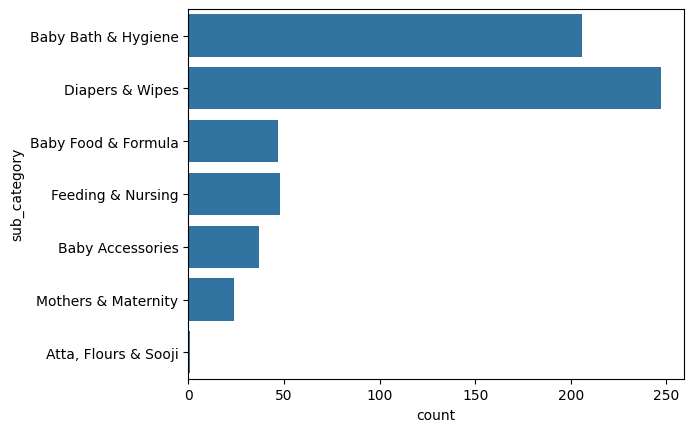

In [ ]:
sns.countplot(y=sub_cat_baby.sub_category)

In [ ]:
sub_cat_baby.brand.value_counts().sort_values(ascending=False)

,count
brand,
Huggies,67
Pampers,63
Mee Mee,41
Himalaya,33
The Moms Co,32
...,...
Canopus,1
PRISTINE,1
Bella baby Happy,1


In [ ]:
sub_cat_baby.brand.value_counts().sort_values(ascending=False).head()

,count
brand,
Huggies,67
Pampers,63
Mee Mee,41
Himalaya,33
The Moms Co,32


([<matplotlib.patches.Wedge at 0x7d1d67304f10>,
 [Text(0.6907340689387267, 0.8560878728304417, 'Huggies'),
  Text(-0.9550590129505899, 0.5457676078532373, 'Pampers '),
  Text(-0.7132788571333565, -0.8373967231644348, 'Mee Mee'),
  Text(0.3035137513963949, -1.0572981616901107, 'Himalaya'),
  Text(1.0016982072232632, -0.4545334989257673, 'The Moms Co')],
 [Text(0.3767640376029418, 0.46695702154387725, '28.4%'),
  Text(-0.5209412797912308, 0.2976914224654021, '26.7%'),
  Text(-0.38906119480001256, -0.4567618489987826, '17.4%'),
  Text(0.16555295530712447, -0.5767080881946058, '14.0%'),
  Text(0.546380840303598, -0.24792736305041846, '13.6%')])

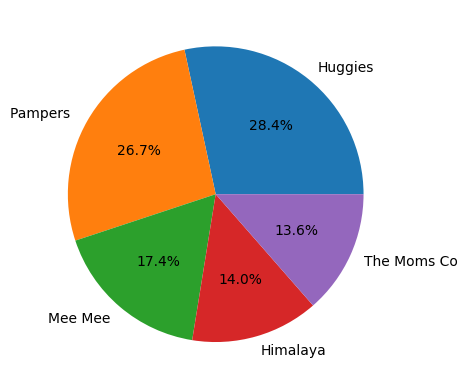

In [ ]:
plt.pie(sub_cat_baby.brand.value_counts().head(),labels=sub_cat_baby.brand.value_counts().head().index, autopct="%1.1f%%")

## **Observations** and Insights:
.The lower quantity of baby products could be attributed to their shorter period of usage and customer senstivity

.Diapers and wipes have higher quantities due to their daily use nature and increased market competition.

.Baby bath and hygiene products are extensive quantity of products, indicating their frequent usage, wide range of products.

.The "Mothers & Maternity" category comprises 24 items, whereas in the "Beauty and Hygiene" category, there are 7 items. **This discrepancy may suggest a greater specificity towards baby-related products in the former and a focus on maternal hygiene in the latter.**

.The market is highly competitive, with Huggies and Pampers as dominant players. Anticipated future performance suggests that brands like Mee Mee, Himalaya, and The Moms Co. may thrive in a more competitive market, emphasizing quality products.

##4. analysing food related items

In [ ]:
df[df.category=="Fruits & Vegetables"]

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
89,Sweet Corn Kernels - Chipotle,Fruits & Vegetables,Cuts & Sprouts,Supa Corn,55.0,55.00,Cut & Peeled Veggies,<bound method Series.median of 0 4.1\n1...,"Ready To Eat Sweet Corn kernels, packaged usin..."
115,Sapota - Organically Grown,Fruits & Vegetables,Fresh Fruits,Fresho,35.0,43.75,Organic Fruits,<bound method Series.median of 0 4.1\n1...,Brown skinned sapotas are smooth to grainy tex...
122,Cabbage - Red,Fruits & Vegetables,Fresh Vegetables,Fresho,23.0,28.75,Cabbage & Cauliflower,<bound method Series.median of 0 4.1\n1...,"It is round, wrapped in purplish red leaf laye..."
131,Banana - Red,Fruits & Vegetables,Fresh Fruits,Fresho,39.0,48.75,"Banana, Sapota & Papaya",<bound method Series.median of 0 4.1\n1...,Standing apart from the common varieties of ye...
132,"Chilli - Bajji, Mild",Fruits & Vegetables,Herbs & Seasonings,Fresho,14.0,17.50,"Lemon, Ginger & Garlic",<bound method Series.median of 0 4.1\n1...,Fresho is our brand of fresh fruits and vegeta...
...,...,...,...,...,...,...,...,...,...
27310,Leeks,Fruits & Vegetables,Exotic Fruits & Veggies,Fresho,16.0,20.00,Exotic Vegetables,<bound method Series.median of 0 4.1\n1...,Leek is a long bundle of leaf sheaths with a m...
27319,Tapioca - Organically Grown,Fruits & Vegetables,Organic Fruits & Vegetables,Fresho,18.0,22.50,Organic Vegetables,<bound method Series.median of 0 4.1\n1...,It Is Organically Grown And Handpicked From Fa...
27377,Fried Rice Mix,Fruits & Vegetables,Cuts & Sprouts,Fresho,45.0,56.25,Recipe Packs,<bound method Series.median of 0 4.1\n1...,"This pack of cut Beans, Carrots, Sweetcorn, Ba..."
27487,Broad Beans - Diced,Fruits & Vegetables,Fresh Vegetables,Fresho,33.0,41.25,Cut & Peeled Veggies,<bound method Series.median of 0 4.1\n1...,Fresh broad beans have a delicious earthy flav...


In [ ]:
df[df.category=="Fruits & Vegetables"].sub_category.value_counts()

,count
sub_category,
Fresh Vegetables,168
Fresh Fruits,124
Cuts & Sprouts,95
Exotic Fruits & Veggies,70
Organic Fruits & Vegetables,68
Herbs & Seasonings,24
"Flower Bouquets, Bunches",8


([<matplotlib.patches.Wedge at 0x7d1d67323190>,
 [Text(0.6420380619919777, 0.8931893007384188, 'Fresh Vegetables'),
  Text(-0.9394406438315052, 0.5722335857999312, 'Fresh Fruits'),
  Text(-0.8496961299273751, -0.6985817681463219, 'Cuts & Sprouts'),
  Text(0.05271579729290133, -1.09873611241088, 'Exotic Fruits & Veggies'),
  Text(0.8089645513643765, -0.7453699448165544, 'Organic Fruits & Vegetables'),
  Text(1.072124104148907, -0.24606890356748473, 'Herbs & Seasonings'),
  Text(1.0988804157562468, -0.049616850639455985, 'Flower Bouquets, Bunches')],
 [Text(0.3502025792683514, 0.4871941640391375, '30.2%'),
  Text(-0.5124221693626391, 0.3121274104363261, '22.3%'),
  Text(-0.4634706163240227, -0.38104460080708463, '17.1%'),
  Text(0.02875407125067345, -0.5993106067695708, '12.6%'),
  Text(0.44125339165329625, -0.40656542444539323, '12.2%'),
  Text(0.5847949658994037, -0.13421940194590073, '4.3%'),
  Text(0.5993893176852255, -0.027063736712430533, '1.4%')])

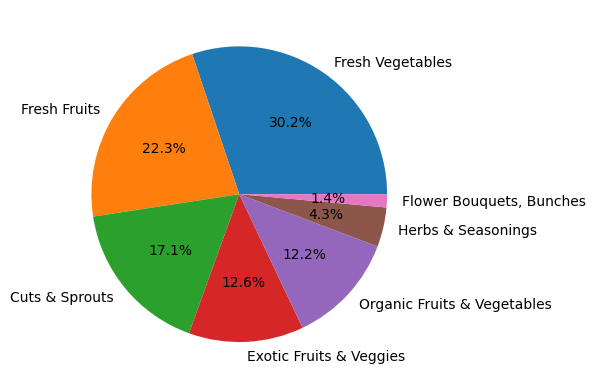

In [ ]:
plt.pie(df[df.category=="Fruits & Vegetables"].sub_category.value_counts(),labels=df[df.category=="Fruits & Vegetables"].sub_category.value_counts().index,autopct="%1.1f%%")

In [ ]:
df[df.category=="Fruits & Vegetables"].brand.value_counts()

,count
brand,
Fresho,544
Supa Corn,6
Tadaa,5
bb Combo,1
RoseBazaar,1


<Axes: xlabel='count', ylabel='brand'>

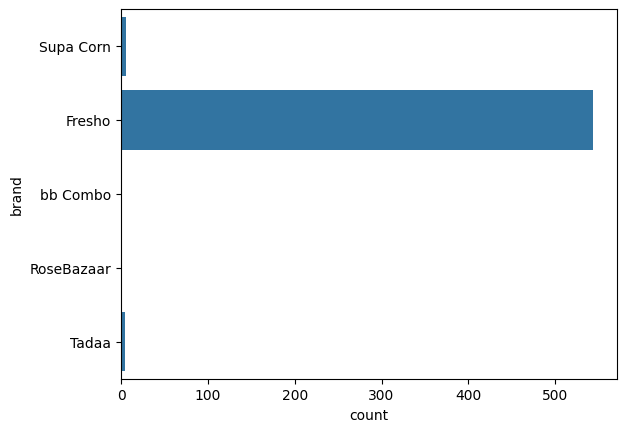

In [ ]:
sns.countplot(y=df[df.category=="Fruits & Vegetables"].brand)

**Observations** and Insights:
Fresh fruits and vegetables dominate the category, constituting a significant share of approximately 65.1%, encompassing both common and exotic varieties
There is room for improvement in the "Herbs and Seasonings" subcategory as the current list of items is relatively limited.

**Insight:** The brand "Fresho" currently holds a dominant position in this category with minimal competition. To enhance competitiveness, Big Basket could consider inviting more brands to its platform, encouraging competitive pricing, and ensuring the delivery of high-quality goods.

##5.examining the eggs meat & fish category

In [ ]:
df[df.category=="Eggs, Meat & Fish"]

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
240,Fresh Catch Fish Fingers,"Eggs, Meat & Fish",Fish & Seafood,Ifb,240.00,240.0,Frozen Fish & Seafood,<bound method Series.median of 0 4.1\n1...,You can’t beat the classics. Perfectly crispy ...
260,Chicken Cocktail Sausage,"Eggs, Meat & Fish","Sausages, Bacon & Salami",Fresho,171.60,220.0,Chicken Sausages,<bound method Series.median of 0 4.1\n1...,Chicken Cocktail Sausage is made with premium ...
293,Pork Classic Salami,"Eggs, Meat & Fish","Sausages, Bacon & Salami",La Carne,191.25,225.0,Pork & Ham,<bound method Series.median of 0 4.1\n1...,"At La Carne, we take pride in offering product..."
313,"Pork - Fresh Bacon, Sliced","Eggs, Meat & Fish","Sausages, Bacon & Salami",Fresho Signature,360.00,400.0,Pork & Ham,<bound method Series.median of 0 4.1\n1...,Casanova Bacon Sliced (Fresh) is a premium-qua...
317,Chicken Jalapeno Cheese Nuggets,"Eggs, Meat & Fish","Sausages, Bacon & Salami",Meatzza,285.00,300.0,Chicken Sausages,<bound method Series.median of 0 4.1\n1...,"Boneless chicken meat, formed, batter-coated &..."
...,...,...,...,...,...,...,...,...,...
27190,Fish - Nuggets,"Eggs, Meat & Fish",Fish & Seafood,Seastar,168.00,210.0,Frozen Fish & Seafood,<bound method Series.median of 0 4.1\n1...,"Sea star frozen BASA FISH fillets, packed by u..."
27293,Italian - Sausages Chicken,"Eggs, Meat & Fish","Sausages, Bacon & Salami",Yummiez,150.00,160.0,Chicken Sausages,<bound method Series.median of 0 4.1\n1...,Now you can relish an Italian Breakfast everyd...
27356,Prawns Balchao Masala,"Eggs, Meat & Fish",Fish & Seafood,Gadre,254.15,299.0,Frozen Fish & Seafood,<bound method Series.median of 0 4.1\n1...,Prawns Balchao Masala is made with combining P...
27466,Chicken Seekh Kabab Punjabi,"Eggs, Meat & Fish","Sausages, Bacon & Salami",Fresho,223.00,290.0,Chicken Sausages,<bound method Series.median of 0 4.1\n1...,"Prepared in the traditional style, the kebabs ..."


In [ ]:
df[df.category=="Eggs, Meat & Fish"].sub_category.value_counts()

,count
sub_category,
"Sausages, Bacon & Salami",159
Fish & Seafood,132
Eggs,34
Mutton & Lamb,19
Pork & Other Meats,5
Marinades,1


In [ ]:
# Analyzing the market share of brands in this category.

df[df.category=="Eggs, Meat & Fish"].brand.value_counts()

,count
brand,
Fresho,71
Fresho Signature,31
La Carne,28
Golden Prize,19
Meatzza,19
Gadre,14
H.S. Dry Fish,13
Seastar,12
Quickee'S,11


In [ ]:
# top 10 meat brands
top10meatbrands= df[df.category=="Eggs, Meat & Fish"].brand.value_counts().head(10)

In [ ]:
top10meatbrands

,count
brand,
Fresho,71
Fresho Signature,31
La Carne,28
Golden Prize,19
Meatzza,19
Gadre,14
H.S. Dry Fish,13
Seastar,12
Quickee'S,11


([<matplotlib.patches.Wedge at 0x7d1d672d6f50>,
 [Text(0.6142742182773018, 0.9125059916295399, 'Fresho'),
  Text(-0.798954402755246, 0.7560898506910461, 'Fresho Signature'),
  Text(-1.0983296652150345, -0.060596588258996234, 'La Carne'),
  Text(-0.8393924338564488, -0.7109292102484941, 'Golden Prize'),
  Text(-0.37147055018335756, -1.0353789790924257, 'Meatzza'),
  Text(0.1210091335602319, -1.0933237350368838, 'Gadre'),
  Text(0.5101629194886192, -0.9745428649263452, 'H.S. Dry Fish'),
  Text(0.8092963586440788, -0.7450096669744861, 'Seastar'),
  Text(1.0011668397715026, -0.4557027089473384, "Quickee'S"),
  Text(1.0895743035556154, -0.1510888382088355, 'Ifb')],
 [Text(0.3350586645148918, 0.4977305408888399, '31.1%'),
  Text(-0.43579331059377047, 0.41241264583147963, '13.6%'),
  Text(-0.5990889082991097, -0.03305268450490703, '12.3%'),
  Text(-0.45785041846715385, -0.3877795692264513, '8.3%'),
  Text(-0.2026203001000132, -0.5647521704140503, '8.3%'),
  Text(0.06600498194194467, -0.596358

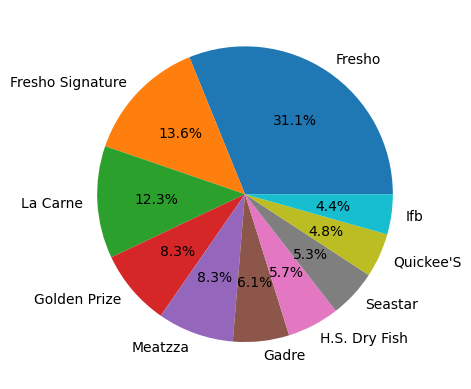

In [ ]:
plt.pie(top10meatbrands, labels=top10meatbrands.index,autopct="%1.1f%%")

**Observations:**
.In the egg, meat, and fish category, Fresho holds a significant market share, establishing itself as a major player among competing brands.

.La Carne secures the position of the second-largest brand, holding a notable market share in the egg, meat, and fish category.

.Other brands in the category collectively share a similar percentage of the market, indicating a relatively balanced distribution of market share among them.

**Insight:** BigBasket currently has limited openness to other players in this market. To foster competition and enhance product quality, it is advisable for BigBasket to extend invitations to other suppliers. Introducing attractive offers can incentivize new suppliers, thereby increasing choices for customers and boosting sales.

## 6. analysis based on rating

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [ ]:
data = df.groupby('category')['rating'].mean().round(2).sort_values(ascending=False)

In [ ]:
data.reset_index()

,category,rating
0,Beverages,4.08
1,"Foodgrains, Oil & Masala",4.06
2,Baby Care,4.02
3,Gourmet & World Food,3.98
4,Snacks & Branded Foods,3.98
5,Cleaning & Household,3.96
6,Beauty & Hygiene,3.93
7,"Bakery, Cakes & Dairy",3.91
8,"Kitchen, Garden & Pets",3.73
9,"Eggs, Meat & Fish",NaN


<Axes: ylabel='category'>

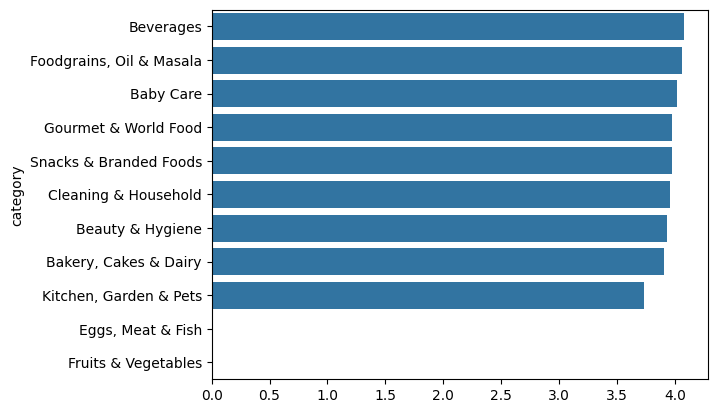

In [ ]:
sns.barplot(x=data.values,y=data.index)

## Reviewing items based on the discounts offered.

In [ ]:
df.groupby('category')['market_price'].sum()

,market_price
category,
Baby Care,364020.00
"Bakery, Cakes & Dairy",134357.00
Beauty & Hygiene,3882642.22
Beverages,240927.00
Cleaning & Household,701150.35
"Eggs, Meat & Fish",114042.42
"Foodgrains, Oil & Masala",615833.00
Fruits & Vegetables,35889.55
Gourmet & World Food,1680993.95


In [ ]:
# Assigning the Maximum Retail Price (MRP) to the variable "MRP" for ease of reference.

MRP = df.groupby('category')['market_price'].sum()

In [ ]:
df.groupby('category')['sale_price'].sum()

,sale_price
category,
Baby Care,326317.17
"Bakery, Cakes & Dairy",121525.14
Beauty & Hygiene,3294599.44
Beverages,212186.67
Cleaning & Household,605043.09
"Eggs, Meat & Fish",101114.12
"Foodgrains, Oil & Masala",516916.23
Fruits & Vegetables,28345.36
Gourmet & World Food,1500115.31


In [ ]:
# Assigning the Selling Retail Price (SRP) to the variable "SRP" for ease of reference.
SRP = df.groupby('category')['sale_price'].sum()

In [ ]:
# Calculating discounts for each category using the Maximum Retail Price (MRP) and the Selling Price (SRP).

Discount = (MRP-SRP)/MRP * 100

In [ ]:
Discount= Discount.round(2)

In [ ]:
Discount = Discount.sort_values()

In [ ]:
Discount

,0
category,
Snacks & Branded Foods,7.94
"Bakery, Cakes & Dairy",9.55
Baby Care,10.36
Gourmet & World Food,10.76
"Eggs, Meat & Fish",11.34
Beverages,11.93
Cleaning & Household,13.71
Beauty & Hygiene,15.15
"Foodgrains, Oil & Masala",16.06


In [ ]:
Discount.reset_index()

,category,0
0,Snacks & Branded Foods,7.94
1,"Bakery, Cakes & Dairy",9.55
2,Baby Care,10.36
3,Gourmet & World Food,10.76
4,"Eggs, Meat & Fish",11.34
5,Beverages,11.93
6,Cleaning & Household,13.71
7,Beauty & Hygiene,15.15
8,"Foodgrains, Oil & Masala",16.06
9,Fruits & Vegetables,21.02


<Axes: ylabel='category'>

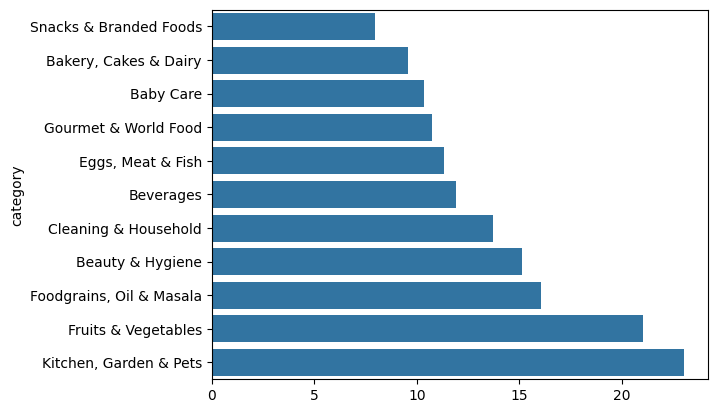

In [ ]:
sns.barplot(y=Discount.index ,x=Discount.values)

**Observations and Insights:**

.The category "Kitchen, Garden & Pets" has the highest discount of 23.03%, likely due to high margin,clearance sales, or seasonal discounts to boost sales and attract customers in this segment.

.The category "Snacks & Branded Foods" has the least discount at 7.94%, possibly because of thinner profit margins in this competitive market.

.The higher discount rate of 21.02% in "Fruits & Vegetables" may be influenced by factors such as perishability, seasonal fluctuations, and the need to manage inventory with shorter shelf life